![Astrofisica Computacional](../../logo.png)

---
##  `FITS` File (Images) II


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will use `FITSIO` to read a .fits file and display its contents as an astronomical image.

---

## FITS files of images with different filters

On this occasion, a set of FITS images of the galaxy M31, obtained from the SIMBAD Database, will be used. First go to the portal

http://cdsportal.u-strasbg.fr/?target=andromeda

In the Tabular Data section, go to the images tab and download the files

m31_sdss_obs_flux_attcorr_nomask_g.fit\
m31_sdss_obs_flux_attcorr_nomask_r.fit \
m31_sdss_obs_flux_attcorr_nomask_u.fit \
m31_sdss_obs_flux_attcorr_nomask_i.fit

which correspond to photometric images with the [filters](https://en.wikipedia.org/wiki/Photometric_system): *g*, *r*, *u* and *i*.


---

## 1. Read the information from the .fits file

Now we will read the HDU information in the file, a list-like collection of HDU (Header Data Unit) objects.

In [1]:
using FITSIO

hdul = FITS("data/m31_sdss_obs_flux_attcorr_nomask_r.fit")
hdul

File: data/m31_sdss_obs_flux_attcorr_nomask_r.fit
Mode: "r" (read-only)
HDUs: Num  Name  Type   
      1          Image  

Here there is only one HDU (Primary) with the photometric information in an array of size (2300,7400).

The Header gives us the complete information,

In [2]:
hdul[1]

File: data/m31_sdss_obs_flux_attcorr_nomask_r.fit
HDU: 1
Mode: read-only
Type: Image
Datatype: Float32
Datasize: (2300, 7400)

Now we read the data and assign it to an object in Python,

In [3]:
image_data = read(hdul[1])

size(image_data)

(2300, 7400)

## 2. Image Display

When visualizing with a gray color mada one has

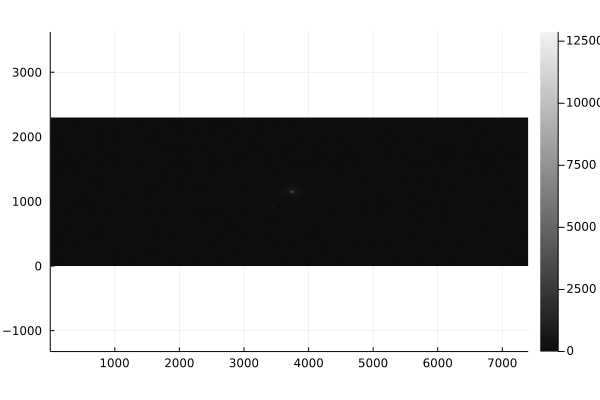

In [4]:
using Plots

heatmap(image_data, ratio=:equal, c=:grays)

The image is almost completely dark. Changing the color map does not give a better result,

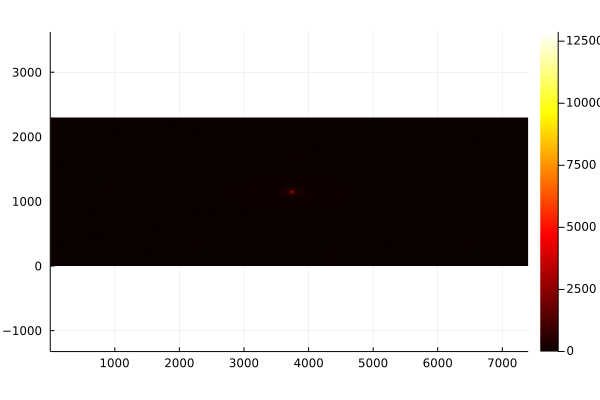

In [5]:
heatmap(image_data, ratio=:equal, c=:hot)

These results are due to the wide range of values that the numbers take within the array. To improve the image we will use a logarithmic scale,

In [8]:
minimum(image_data)

-3.081798f0

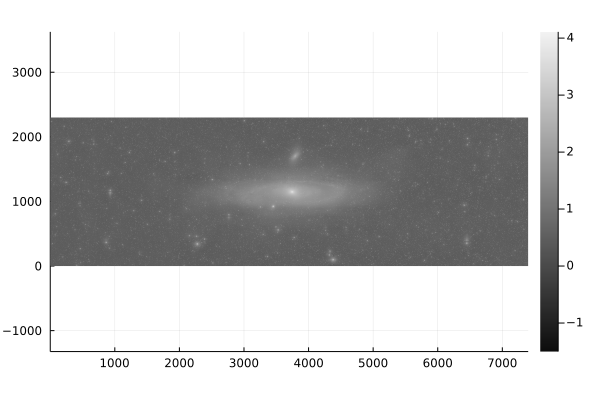

In [14]:
image_data2 = image_data .- minimum(image_data)

heatmap(log10.(image_data2), ratio=:equal, c=:grays)

In [18]:
heatmap(log10.(image_data2), ratio=:equal, c=:magma)